<a href="https://colab.research.google.com/github/yungminSW/study_test/blob/main/Multiple_linearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
# Load dataset
from sklearn.datasets import load_boston 
boston_ds = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
frame = pd.DataFrame(boston_ds.data)
frame_ = pd.DataFrame(boston_ds.data, columns = boston_ds.feature_names)
# add target 
frame['target'] = boston_ds.target
frame_['target'] = boston_ds.target
print(frame_)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  target  
0       15.3  396.90   4.98    24.0  
1       17.8  396.90   

In [ ]:
# number of data points
N = len(frame[0])
# dimension of input space
dim = 13
# make constant matrix X
X = np.reshape(np.ones_like(frame[0]), (N,1))
for i in range(dim):
  X = np.concatenate((X, np.reshape(np.array(frame[i]), (N,1))), axis = 1)
print('X.shape = ', X.shape)
print(X)

X.shape =  (506, 14)
[[1.0000e+00 6.3200e-03 1.8000e+01 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [1.0000e+00 2.7310e-02 0.0000e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [1.0000e+00 2.7290e-02 0.0000e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [1.0000e+00 6.0760e-02 0.0000e+00 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0000e+00 1.0959e-01 0.0000e+00 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [1.0000e+00 4.7410e-02 0.0000e+00 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [ ]:
# LSE for B in the model y = XB + e
y = np.reshape(np.array(frame['target']), (N,1))
B_hat = np.matmul(np.matmul(np.linalg.inv((np.matmul(X.T,X))), X.T), y)
print('estimated B = ')
print(B_hat)

# predicted y
y_hat = np.matmul(X, B_hat)

# estimator for std(y)
s = math.sqrt(np.sum(np.power(y - np.matmul(X,B_hat),2)) / (N - dim - 1))

# estimator for variance of B_hat
cov_B = s**2 * np.linalg.inv((np.matmul(X.T,X)))
var_B_hat = cov_B.diagonal()
std_B_hat = np.sqrt(var_B_hat)
print('estimated VAR[B] = ')
print(np.reshape(var_B_hat, (dim+1,1)))

# get adjusted R^2
SSR = np.sum(np.power(y_hat - y,2))
SST = np.sum(np.power(y- np.mean(y),2))
R_2 = SSR/SST
adj_R_2 = ((N - 1)*(1 - R_2)) / (N - dim - 1)
print('Adusted R^2  = ', adj_R_2)

estimated B = 
[[ 3.64594884e+01]
 [-1.08011358e-01]
 [ 4.64204584e-02]
 [ 2.05586264e-02]
 [ 2.68673382e+00]
 [-1.77666112e+01]
 [ 3.80986521e+00]
 [ 6.92224640e-04]
 [-1.47556685e+00]
 [ 3.06049479e-01]
 [-1.23345939e-02]
 [-9.52747232e-01]
 [ 9.31168327e-03]
 [-5.24758378e-01]]
estimated VAR[B] = 
[[2.60452918e+01]
 [1.08010784e-03]
 [1.88443200e-04]
 [3.78171976e-03]
 [7.42319676e-01]
 [1.45904420e+01]
 [1.74661518e-01]
 [1.74498340e-04]
 [3.97821912e-02]
 [4.40185014e-03]
 [1.41416344e-05]
 [1.71156401e-02]
 [7.21440767e-06]
 [2.57203944e-03]]
Adusted R^2  =  0.7602124906001053


In [ ]:
def t_distribution(dof):
  end = 10
  N = 1000
  t = np.linspace(-end, end, N)
  if dof <= 100 :
    T = (math.gamma((dof+1)/2) / (math.gamma(dof/2)*math.sqrt(math.pi * dof))) \
      * np.power((1 + np.power(t,2)/dof), -(dof + 1) / 2.)
  
  # If dof is large enough, then T(dof) = N(0.1)
  else:
    mu = 0.
    var = 1.0
    T = (1 / np.sqrt(2 * np.pi * var**2)) * np.exp(-(t-mu)**2 / (2 * var**2))
  return (2 * end / N),t, T

# get t-distribution 
delta, t, t_dist = t_distribution(N - dim - 1)

'''Hypothesis test'''
# observed t
O_t = np.divide(np.squeeze(B_hat), std_B_hat)
print('Observed t-value = ')
print(np.reshape(O_t, (dim+1,1)))
# get P-value
P = np.zeros_like(O_t)
for i in range(len(O_t)):
  result = np.where(np.abs(t) > abs(O_t[i]), t_dist, np.zeros_like(t))
  P[i] = np.sum(result) * delta
print('P-value = ')
print(np.reshape(P, (dim+1,1)))


Observed t-value = 
[[  7.14407419]
 [ -3.28651687]
 [  3.38157628]
 [  0.33431004]
 [  3.11838086]
 [ -4.65125741]
 [  9.1161402 ]
 [  0.05240243]
 [ -7.3980036 ]
 [  4.61289977]
 [ -3.28000914]
 [ -7.28251056]
 [  3.46679256]
 [-10.3471458 ]]
P-value = 
[[8.84344022e-13]
 [1.02482960e-03]
 [7.15122927e-04]
 [7.32862365e-01]
 [1.78732254e-03]
 [3.40193816e-06]
 [8.28481836e-20]
 [9.51154894e-01]
 [1.28543651e-13]
 [4.12684505e-06]
 [1.02482960e-03]
 [3.15656685e-13]
 [5.32621222e-04]
 [0.00000000e+00]]


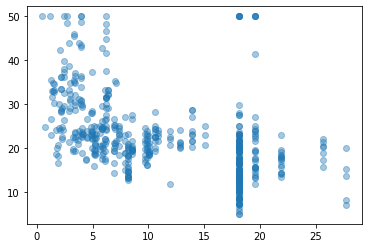

In [ ]:
plt.scatter(frame_['INDUS'], frame_['target'], alpha=0.4)

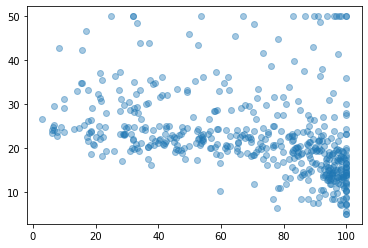

In [ ]:
plt.scatter(frame_['AGE'], frame_['target'], alpha=0.4)

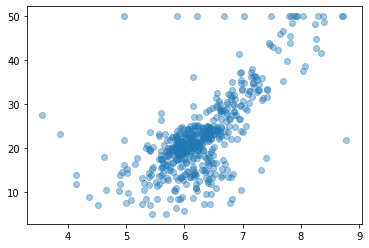

In [ ]:
plt.scatter(frame_['RM'], frame_['target'], alpha=0.4)